# Getting Starteed with Keras

Keras is a high-level Deep Learning API.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

## We will start using keras or learn keras by making a simple <u><b>Image CLassifier</b></u>

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [18]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
X_train_full.shape

(60000, 28, 28)

In [20]:
X_train_full.dtype

dtype('uint8')

In [21]:
X_train_full[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [22]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [24]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [25]:
y_train[0]

4

In [26]:
class_names = ["T-shirt/top","Trouser", "Pullover","Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

In [28]:
# Creating the model using the Sequential API

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [32]:
# You acn get a model's list of layers, to fetch a layer by it's Index, or you can fetch it by name:
model.layers

In [33]:
hidden1 = model.layers[1]

In [34]:
hidden1.name

'dense'

In [35]:
model.get_layer('dense') is hidden1

True

In [36]:
weights, biases = hidden1.get_weights()

In [37]:
weights

array([[ 0.028427  ,  0.06361251, -0.01447526, ...,  0.07392253,
        -0.06510261,  0.0122309 ],
       [ 0.02597439,  0.05365387,  0.03985243, ...,  0.04208728,
         0.02682105, -0.00605302],
       [-0.03466832,  0.06600384, -0.0609683 , ...,  0.04954903,
        -0.00864894,  0.05900355],
       ...,
       [-0.04493846, -0.01012533, -0.0445703 , ..., -0.04452983,
        -0.07009578, -0.0259089 ],
       [ 0.04989405, -0.0525623 , -0.04111688, ..., -0.0307957 ,
        -0.01419926,  0.04393943],
       [-0.03057479,  0.04429321, -0.07184069, ..., -0.05184621,
        -0.02475282, -0.04577924]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
biases.shape

(300,)

In [42]:
# Compiling the model

In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [44]:
#  Training and evaluating the model

In [45]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7272 - accuracy: 0.7641 - val_loss: 0.5309 - val_accuracy: 0.8160
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4920 - accuracy: 0.8276 - val_loss: 0.4575 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4455 - accuracy: 0.8448 - val_loss: 0.4178 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4190 - accuracy: 0.8532 - val_loss: 0.4432 - val_accuracy: 0.8488
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3978 - accuracy: 0.8607 - val_loss: 0.3900 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3821 - accuracy: 0.8646 - val_loss: 0.3852 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8703 - val_loss: 0.3606 - val_accuracy:

In [47]:
history.history

{'loss': [0.7272230982780457,
  0.49197226762771606,
  0.44553568959236145,
  0.4189866781234741,
  0.3978114724159241,
  0.38210511207580566,
  0.3677207827568054,
  0.35665640234947205,
  0.3460318446159363,
  0.33535072207450867,
  0.32592013478279114,
  0.31759247183799744,
  0.31038227677345276,
  0.30426397919654846,
  0.2971784174442291,
  0.2906760573387146,
  0.28450119495391846,
  0.27944695949554443,
  0.27424857020378113,
  0.2684187591075897,
  0.2628864645957947,
  0.2584785223007202,
  0.25398173928260803,
  0.24935194849967957,
  0.24521461129188538,
  0.24054054915905,
  0.23607146739959717,
  0.23350948095321655,
  0.2284998893737793,
  0.22397249937057495],
 'accuracy': [0.764090895652771,
  0.8276181817054749,
  0.8448363542556763,
  0.8531636595726013,
  0.8606908917427063,
  0.864581823348999,
  0.8702909350395203,
  0.8732545375823975,
  0.8771818280220032,
  0.8797454833984375,
  0.8841272592544556,
  0.8855272531509399,
  0.8886545300483704,
  0.890563607215881

In [48]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [49]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

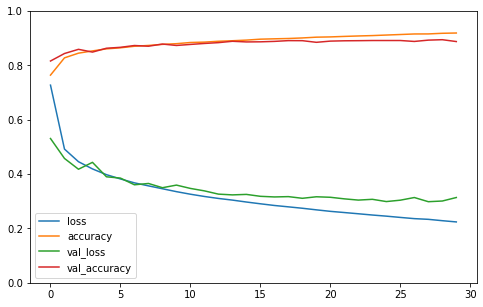

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid = True
plt.gca().set_ylim(0, 1) # set the vertical range to 0-1
plt.show()

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 58.0775 - accuracy: 0.8602


[58.077510833740234, 0.8601999878883362]

In [52]:
# Using the model to predict

In [53]:
# since we don't have new instances to predict we can take from test set 
X_new = X_test[:3]

In [54]:
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [55]:
X_new.shape

(3, 28, 28)

In [56]:
X_test.shape

(10000, 28, 28)

In [57]:
y_proba = model.predict(X_new)

In [58]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [61]:
import numpy as np

In [62]:
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1], dtype=int64)

In [63]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [64]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP using sequential API

Now we know about the MLP classification so next is the Regression

1. Here we will use the California Housign data (Used in chapter 2)

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [ ]:
housing = fetch_california_housing()
housing


In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
X_train

array([[ 5.31973633e-01,  1.88337956e-01, -7.87560007e-02, ...,
         5.12668661e-02, -8.32779821e-01,  7.82370797e-01],
       [-6.34693977e-01,  1.08929049e-01, -5.62041369e-01, ...,
        -1.37527160e-01, -6.35528890e-01,  1.51538448e-01],
       [ 7.44150803e-02, -5.26342209e-01,  3.44763954e-02, ...,
         8.00966048e-04, -7.62333060e-01,  8.32436856e-01],
       ...,
       [ 8.62689939e-01, -1.00279565e+00,  2.90816048e-01, ...,
         9.49972948e-02, -7.76422412e-01,  8.37443462e-01],
       [ 1.96419280e+00, -4.98887657e-02,  8.82800155e-01, ...,
        -6.16819837e-02, -7.81118863e-01,  1.10279358e+00],
       [ 6.09369785e-01,  1.85592501e+00,  3.71921526e-02, ...,
        -1.01558714e-01,  9.94139512e-01, -1.44056224e+00]])

In [9]:
model = keras.models.Sequential([ 
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8312 - val_loss: 0.6072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5543 - val_loss: 0.4983
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4725 - val_loss: 0.4098
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4397 - val_loss: 0.3903
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.3810
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4094 - val_loss: 0.3786
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3987 - val_loss: 0.3647
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3956 - val_loss: 0.3540
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3834 - val_loss: 0.3513
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.3494

In [10]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [11]:
y_pred

array([[1.5678095],
       [3.5317373],
       [3.6329737]], dtype=float32)